In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
#Check the number of unique value on object datatype
df.select_dtypes(include='object').nunique()


Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Area             3
Status           2
dtype: int64

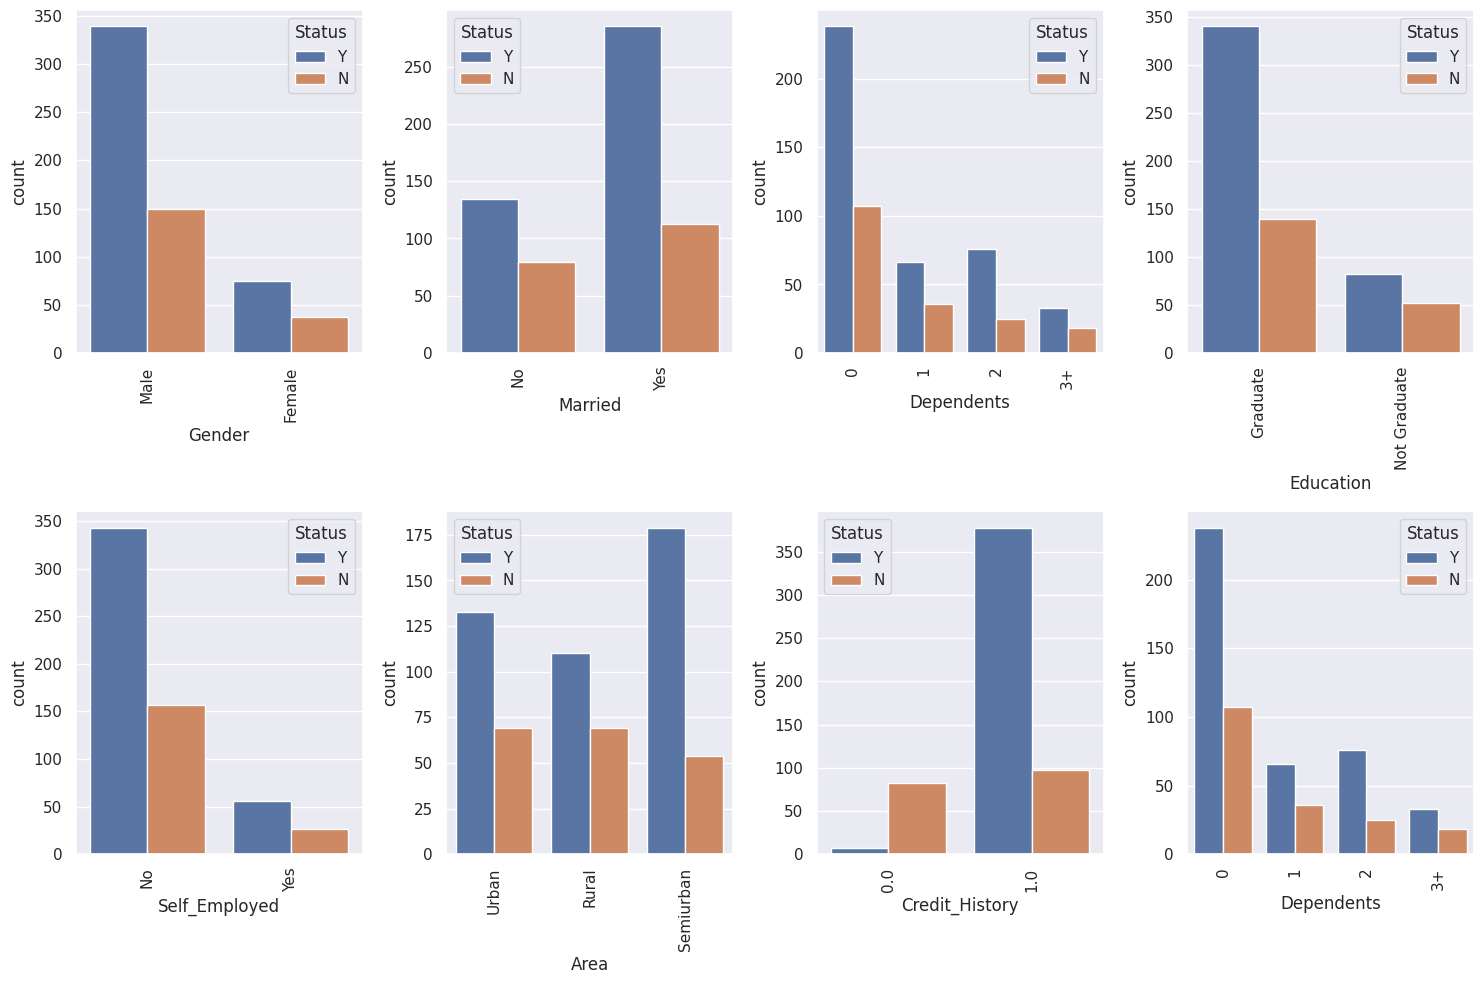

In [9]:
# List of categorical variables to plot
cat_vars = ['Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Area', 'Credit_History', 'Dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
  sns.countplot(x=var, hue='Status', data=df, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()


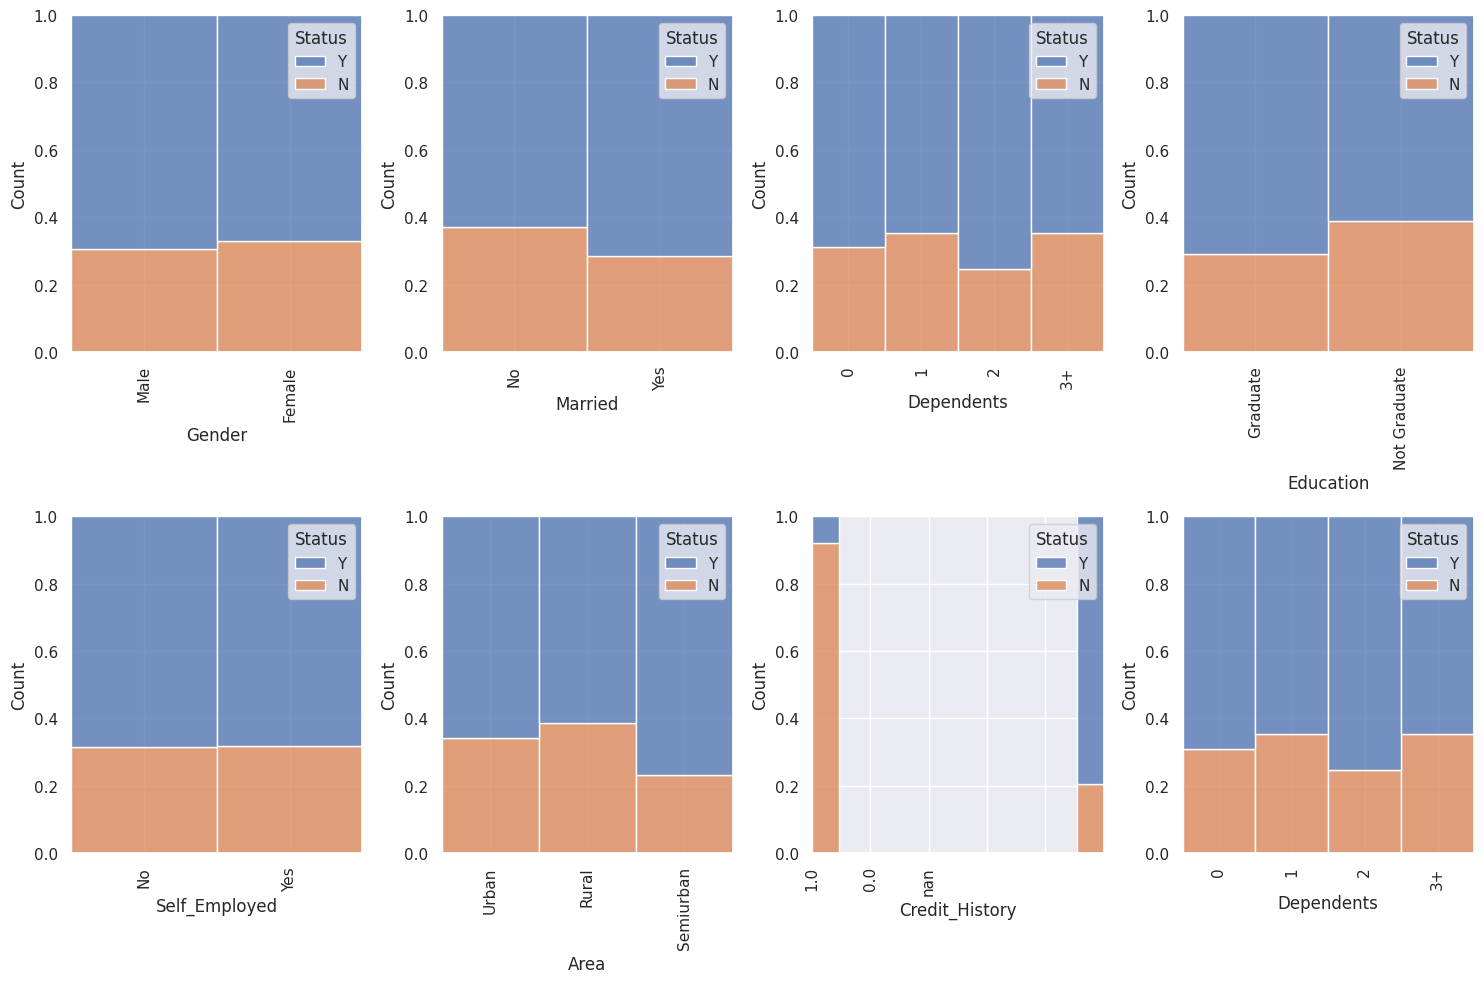

In [15]:
import warnings
warnings.filterwarnings("ignore")
# get List of categorical variables
cat_vars = ['Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Area', 'Credit_History', 'Dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Status', data=df, ax=axs[i], multiple="fill", kde=False)  # Fixed parentheses here
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()


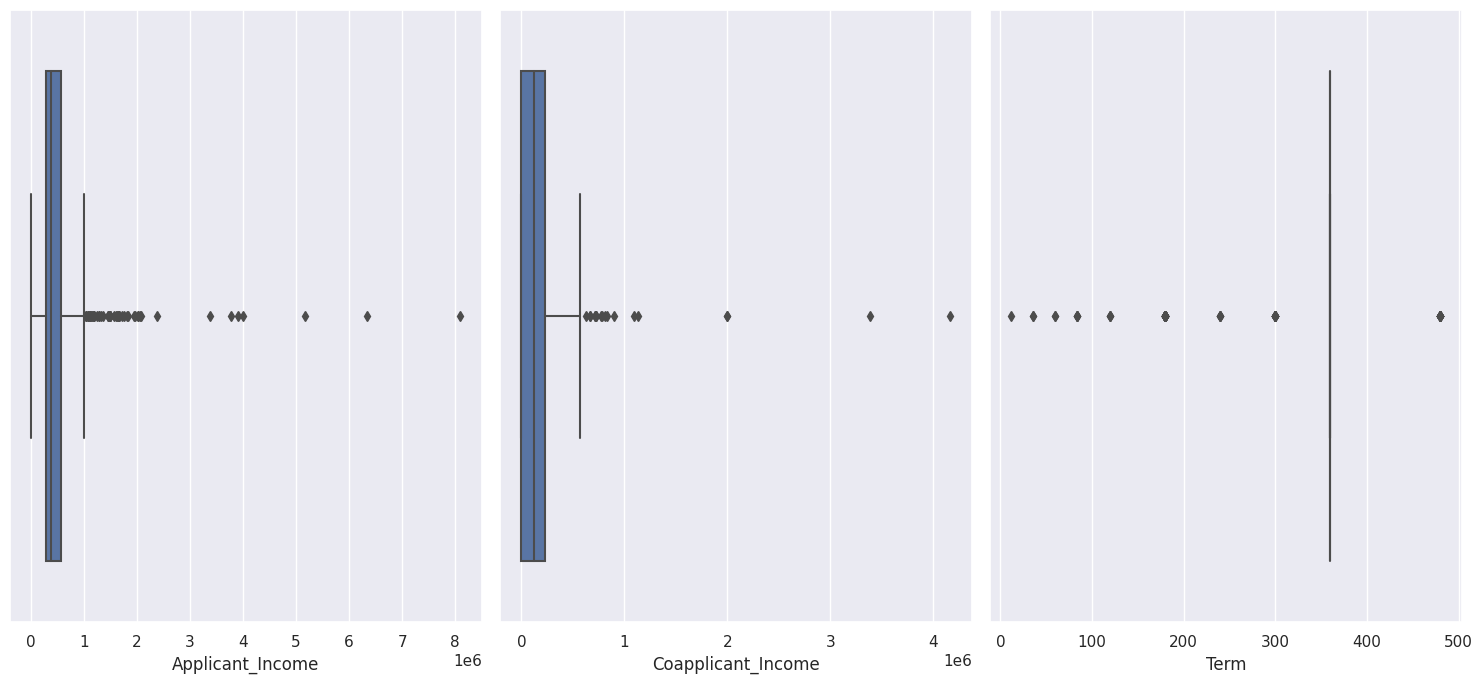

In [17]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(x=var, data=df, ax=axs[i])
fig.tight_layout()
plt.show()


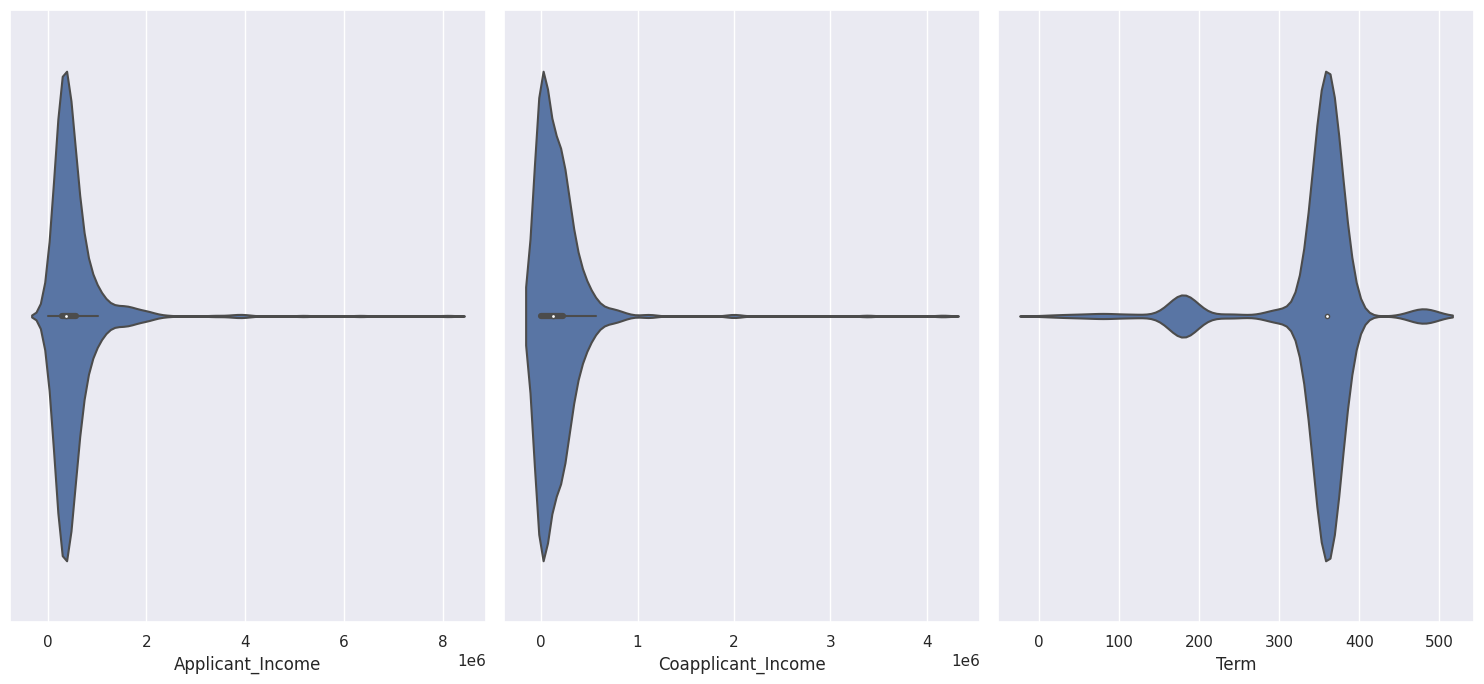

In [19]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()


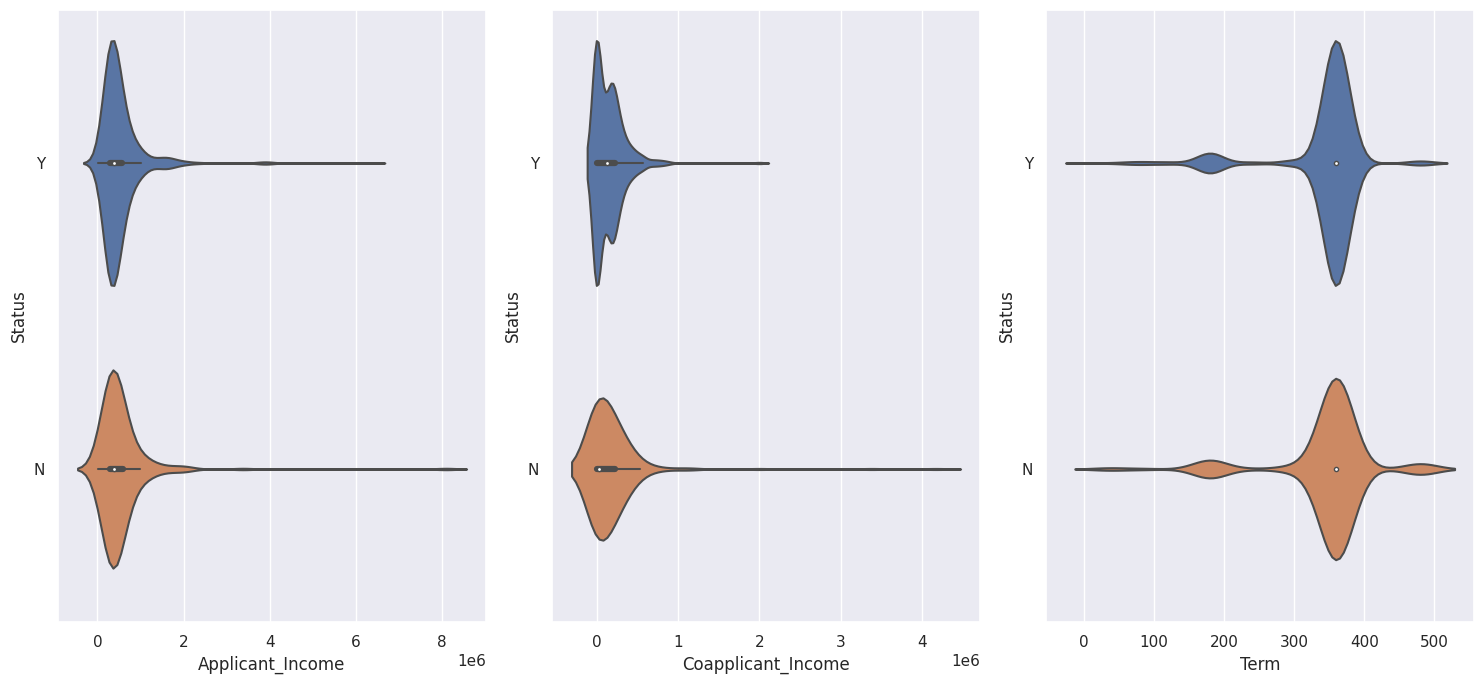

In [20]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.violinplot(x=var, y='Status', data=df, ax=axs[i])
fig.tight_layout()
plt.show()


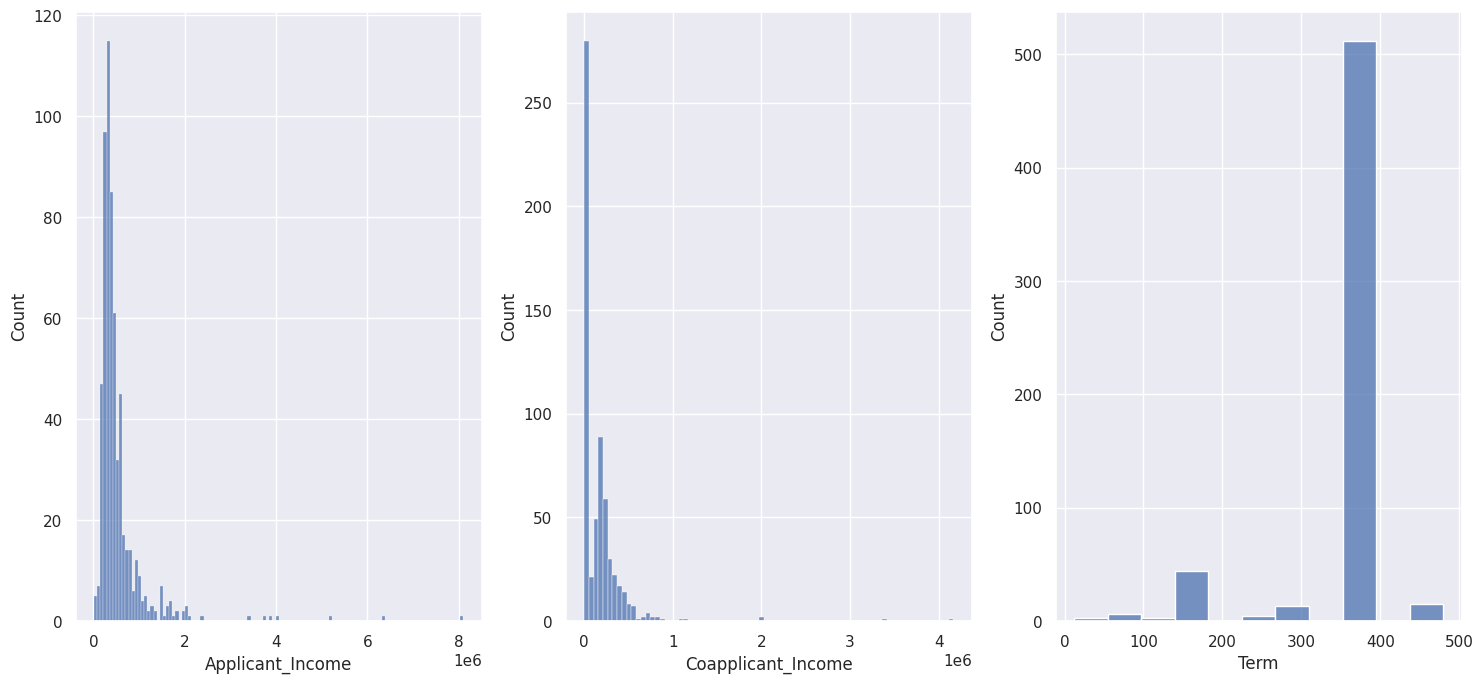

In [21]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars): sns.histplot(x=var, data=df, ax=axs[i])
fig.tight_layout()
plt.show()


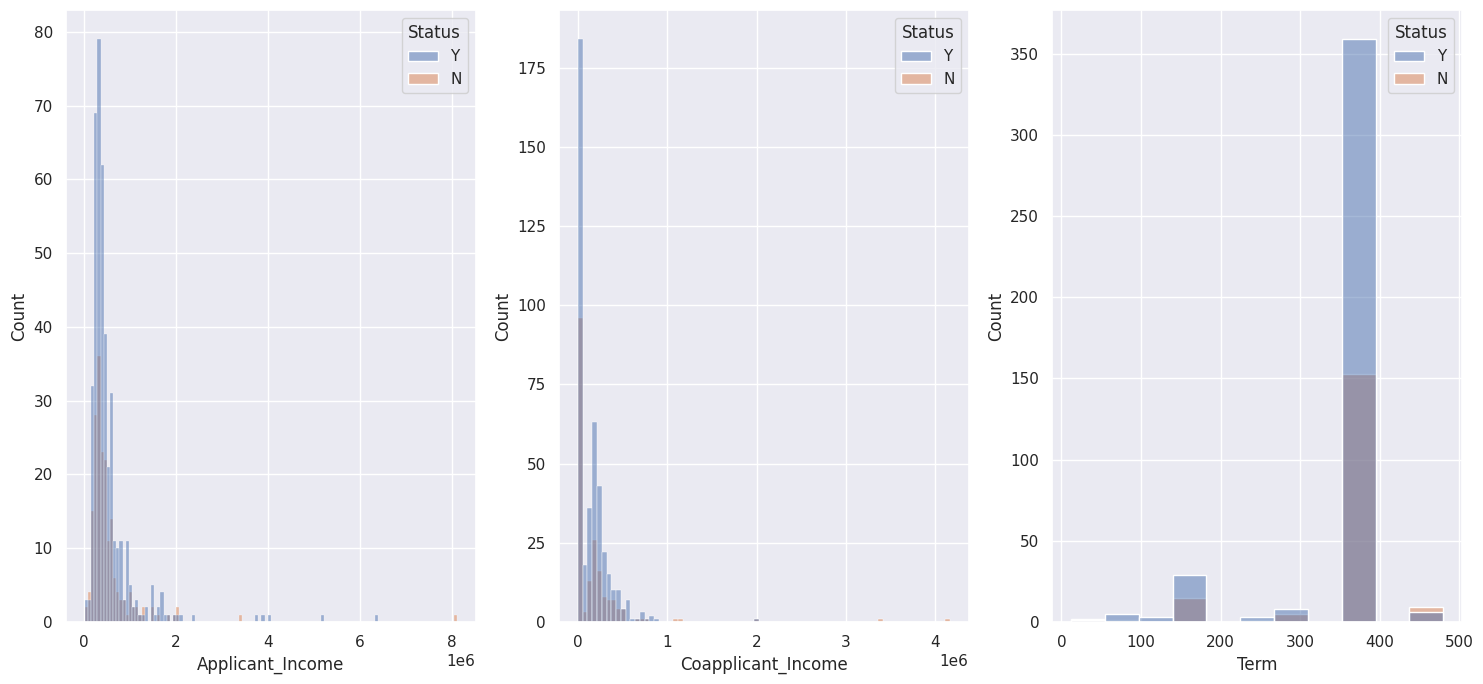

In [22]:
num_vars = ['Applicant_Income', 'Coapplicant_Income', 'Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.histplot(x=var, data=df, hue='Status', ax=axs[i])
fig.tight_layout()
plt.show()


In [24]:
#Data Preprocessing

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [25]:
#Check the missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)


Credit_History    8.143322
Self_Employed     5.211726
Dependents        2.442997
Term              2.280130
Gender            2.117264
Married           0.488599
dtype: float64

In [26]:
# Fill null values with 'Unknown'
df.fillna('Unknown', inplace=True)

#Check the missing value again
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)


Series([], dtype: float64)

In [27]:
df.dtypes


Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                   object
Credit_History         object
Area                   object
Status                 object
dtype: object

In [28]:
#Label Encoding for Object datatype

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
  # Print the column name and the unique values
  print(f"{col}: {df[col].unique()}")


Gender: ['Male' 'Female' 'Unknown']
Married: ['No' 'Yes' 'Unknown']
Dependents: ['0' '1' '2' '3+' 'Unknown']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' 'Unknown']
Term: [360.0 120.0 240.0 'Unknown' 180.0 60.0 300.0 480.0 36.0 84.0 12.0]
Credit_History: [1.0 0.0 'Unknown']
Area: ['Urban' 'Rural' 'Semiurban']
Status: ['Y' 'N']


In [29]:
# Convert selected columns to string data type
df[['Term', 'Credit_History']] = df[['Term', 'Credit_History']].astype( str)


In [31]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
  # Initialize a LabelEncoder object
  label_encoder = preprocessing.LabelEncoder()
  # Fit the encoder to the unique values in the column
  label_encoder.fit(df[col].unique())
  # Transform the column using the encoder
  df[col] = label_encoder.transform(df[col])
  # Print the column name and the unique encoded values
  print(f"{col}: {df[col].unique()}")


Gender: [1 0 2]
Married: [0 2 1]
Dependents: [0 1 2 3 4]
Education: [0 1]
Self_Employed: [0 2 1]
Term: [ 6  1  3 10  2  8  4  7  5  9  0]
Credit_History: [1 0 2]
Area: [2 0 1]
Status: [1 0]


1    422
0    192
Name: Status, dtype: int64

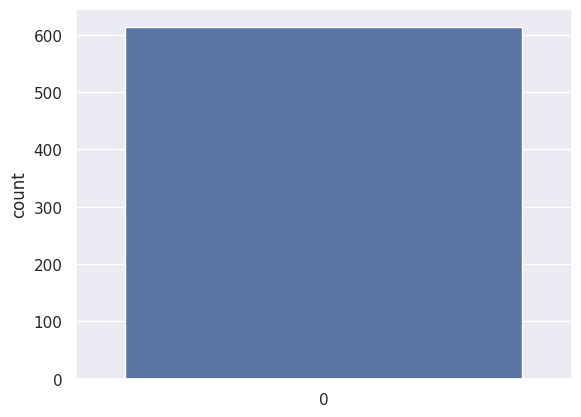

In [32]:
#Check if the Label 'Status' is balanced or not
sns.countplot( df['Status'])
df['Status'].value_counts()

In [34]:
#Oversampling Minority Class to balance the Label
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df[(df['Status']==1)]
df_minority = df[(df['Status']==0)]
 # upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,	# sample with replacement
                                 n_samples= 422, # to match majority class
                                 random_state=0) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])


0    422
1    422
Name: Status, dtype: int64

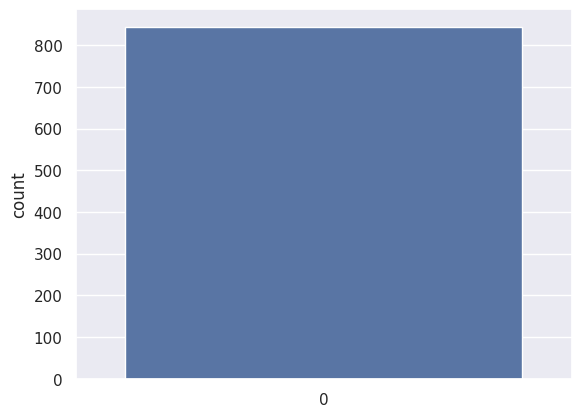

In [36]:
sns. countplot(df_upsampled[ 'Status'])
df_upsampled['Status'].value_counts()

In [38]:
#Remove Outlier using IQR because there are alot of extreme value
df_upsampled. shape

(844, 12)

In [41]:
column_names = ['Applicant_Income', 'Coapplicant_Income', 'Term']

# remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = df_upsampled[column_name].quantile(0.25)
    Q3 = df_upsampled[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df_upsampled = df_upsampled[~((df_upsampled[column_name] < (Q1 - 1.5 * IQR)) | (df_upsampled[column_name] > (Q3 + 1.5 * IQR)))]

df_upsampled.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
148,0,0,0,0,0,1000000,166600.0,22500000,6,1,0,0
338,0,0,3,1,0,183000,0.0,0,6,0,2,0
24,1,2,1,0,1,371700,292500.0,15100000,6,2,1,0
57,1,2,0,0,0,336600,220000.0,13500000,6,1,0,0
107,1,0,0,1,1,733300,0.0,12000000,6,1,0,0


In [42]:
#Check the shape after outlier removal
df_upsampled.shape


(614, 12)

<Axes: >

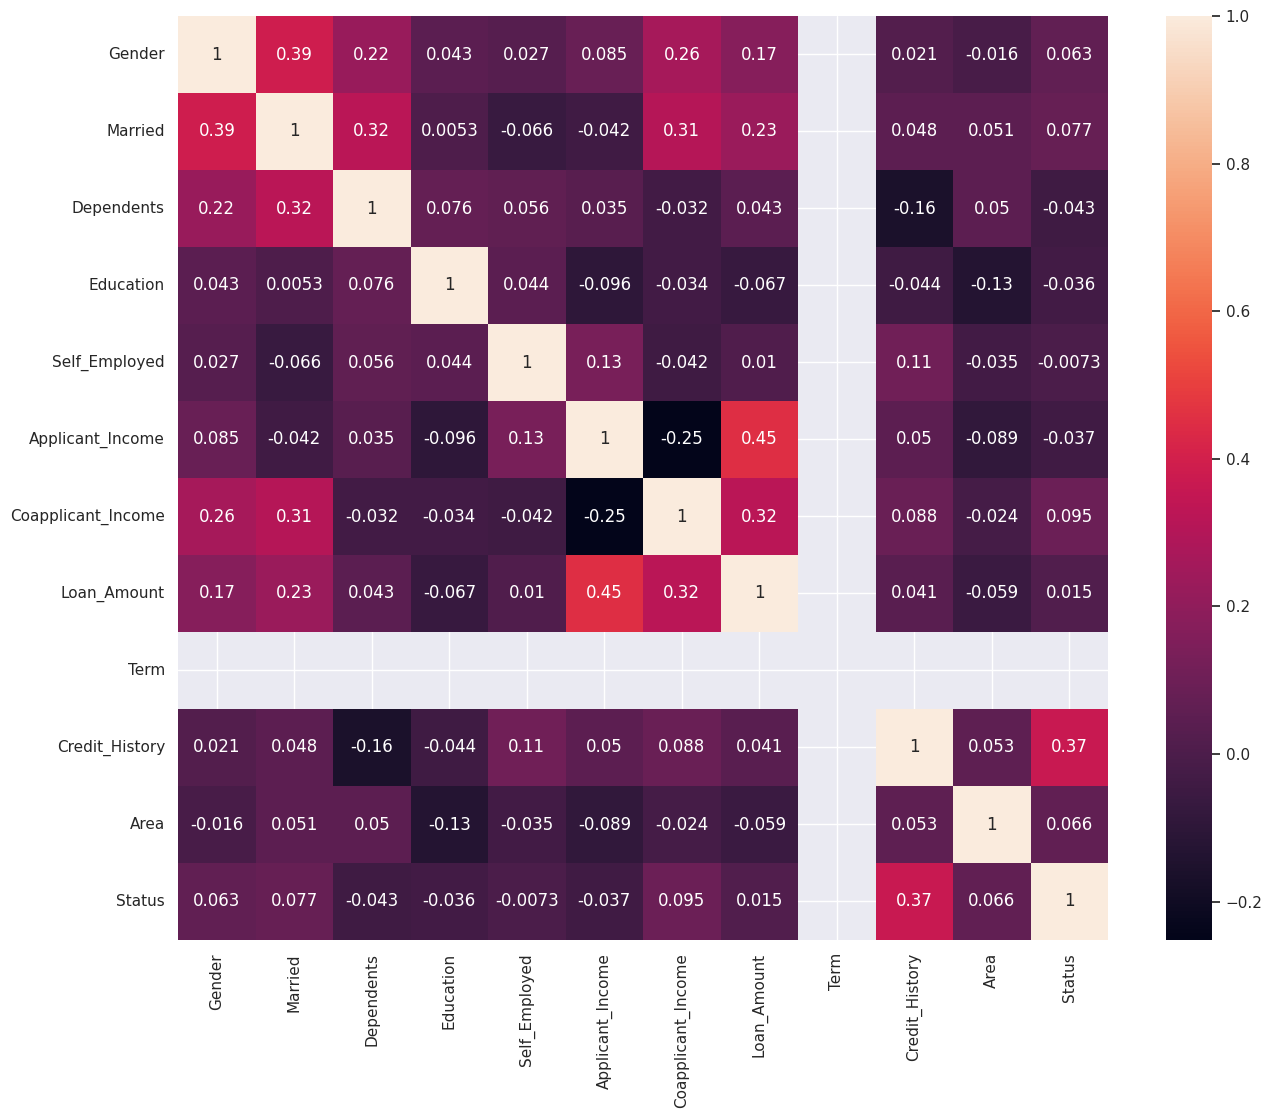

In [43]:
plt.figure(figsize=(15,12))
sns.heatmap(df_upsampled.corr(), fmt='.2g', annot=True)

In [44]:
df_upsampled.drop(columns='Term', inplace=True)

In [46]:
#Train Test Split
X = df_upsampled.drop('Status', axis=1)
y = df_upsampled['Status']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [52]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
'max_depth':[3, 4, 5, 6, 7, 8],
'min_samples_split': [2, 3, 4],
'min_samples_leaf':[1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}


{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [56]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=5)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=0)

In [57]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")


Accuracy Score : 86.99 %


In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

print('F-1 Score:', f1_score(y_test, y_pred, average='micro'))
print('Precision Score:', precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', recall_score(y_test, y_pred, average='micro'))
print('Jaccard Score:', jaccard_score(y_test, y_pred, average='micro'))
print('Log Loss:', log_loss(y_test, y_pred))


F-1 Score: 0.8699186991869918
Precision Score: 0.8699186991869918
Recall Score: 0.8699186991869918
Jaccard Score: 0.7697841726618705
Log Loss: 4.6886053189095485


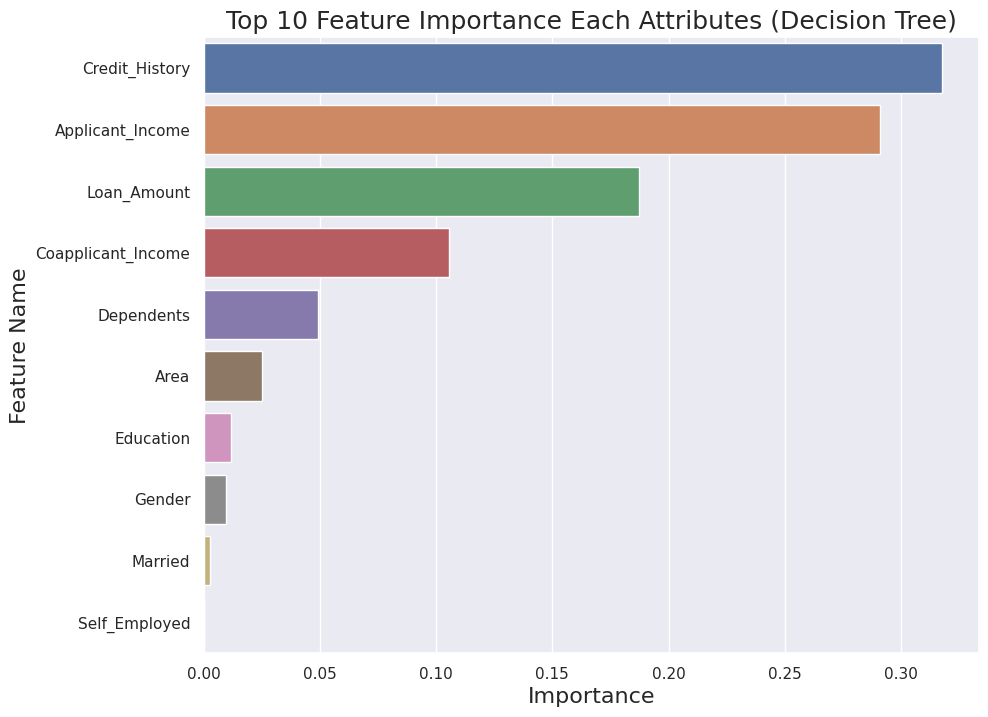

In [60]:
imp_df = pd.DataFrame({
"Feature Name": X_train.columns, "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()


Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8699186991869918')

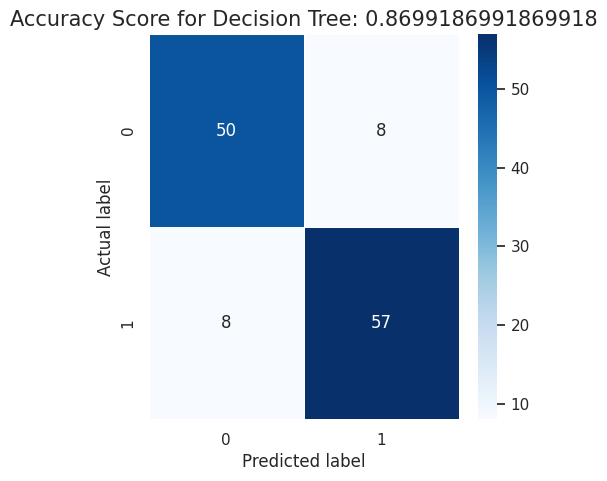

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size=15)


In [71]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = { 'n_estimators':[100, 200],
'max_depth': [None, 5, 10],
'max_features':['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}


In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='log2', n_estimators=200)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_features='log2', n_estimators=200, random_state=0)

In [73]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")


Accuracy Score : 95.12 %


In [74]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

print('F1 Score: ', f1_score(y_test, y_pred, average='micro'))
print('Precision Score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall Score: ', recall_score(y_test, y_pred, average='micro'))
print('Jaccard Score: ', jaccard_score(y_test, y_pred, average='micro'))
print('Log Loss: ', log_loss(y_test, y_pred))


F1 Score:  0.9512195121951219
Precision Score:  0.9512195121951219
Recall Score:  0.9512195121951219
Jaccard Score:  0.9069767441860465
Log Loss:  1.7582269945910807


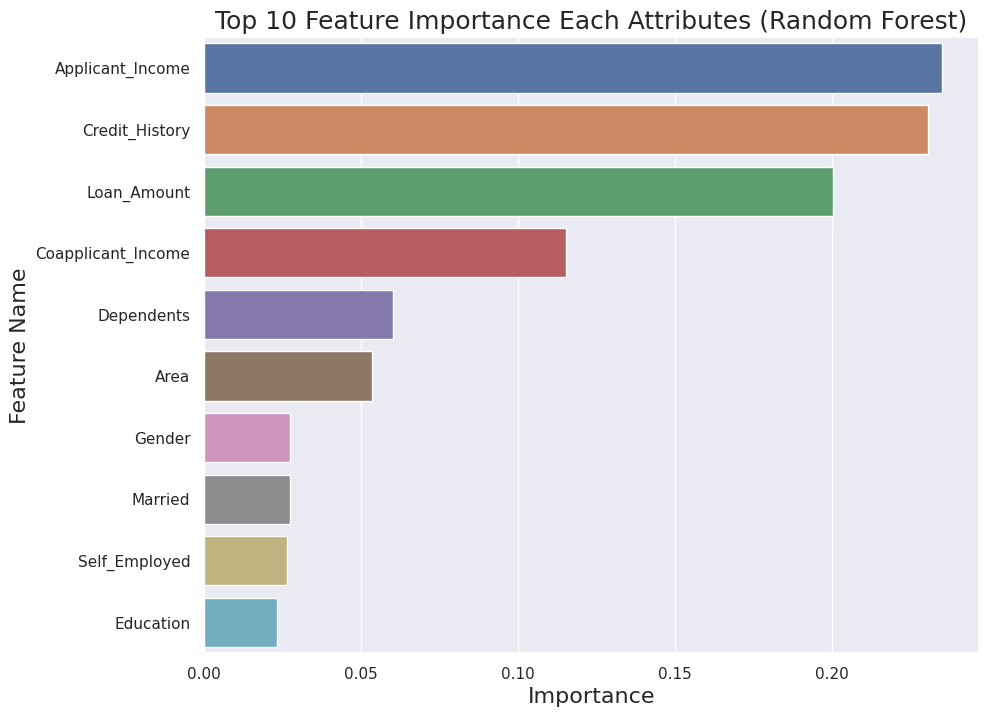

In [75]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()


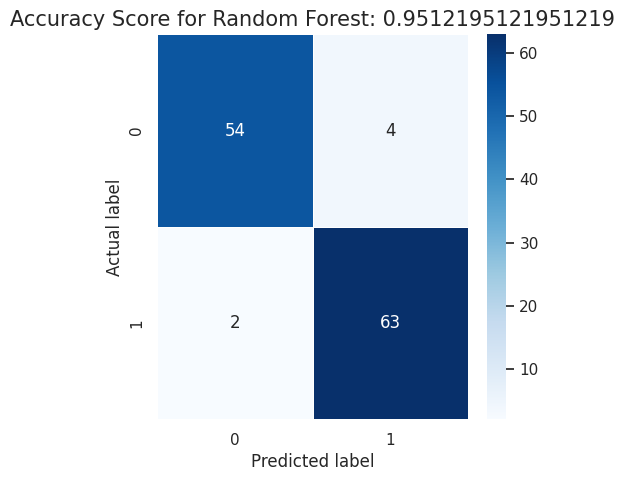

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=0.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.show()
